In [2]:
import pandas as pd
import numpy as np
import os
import glob


import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re
import pickle

import json


Data: get the json data

In [3]:
with open('articles.json', 'r') as fcc_file:
    articles_json = json.load(fcc_file)
    # print(articles_json)

with open('authors.json', 'r') as fcc_file:
    authors_json = json.load(fcc_file)

In [4]:
article_query = "https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article="
author_query = "https://historyofwomenphilosophers.org/ecc/#philosopher="

In [5]:
article_list = []
article_title_list = []


for article in articles_json["article"]:
    filename = article['fn']
    query = article_query+filename
    title = article['title']
    article_title_list.append(title)
    article_list.append(query)

author_dict_list = []
author_list = []

for author in authors_json["author"]:
    first= author['authorFirstname']
    last=author['authorLastname']
    # try:
    #     searchName = author['authorSearch']
    # except:
    #     continue
    name = first+last
    query = author_query + name
    author_dict_list.append(name)
    author_list.append(query)

In [25]:
# article_list
article_title_list
# author_dict_list
# author_list

['<i>Hylomorphism</i> in Oliva Sabuco de Nantes (1562–1626?)',
 '<i>Basis of Morality</i> in Sophie de Grouchy (1764–1822)',
 '<i>Empathy</i> in Sophie de Grouchy (1764–1822)',
 '<i>Teleological Ethics</i> in Sophie de Grouchy (1764–1822)',
 '<i>Misandry</i><i> </i>in Helene Druskowitz (1856<i>–</i>1918)',
 "<i>God's </i><i>M</i><i>ind and </i><i>H</i><i>uman </i><i>K</i><i>nowledge</i> in Damaris Cudworth Masham (1659–1708)",
 '<i>Human </i><i>N</i><i>ature</i> in Damaris Cudworth Masham (1659–1708)',
 "<i>Women's Nature</i> in Damaris Cudworth Masham (1659–1708)",
 '<i>Duties towards strangers/others</i> in Sophie de Grouchy (1764–1822)',
 '<i>Family</i> in Sophie de Grouchy (1764–1822)',
 '<i>Human Rights</i> in Sophie de Grouchy (1764–1822)',
 '<i>Pain</i> in Sophie de Grouchy (1764–1822)',
 '<i>Pleasure</i> in Sophie de Grouchy (1764–1822)',
 '<i>Community</i> in Edith Stein (1891–1942)',
 '<i>Empathy</i> in Edith Stein (1891–1942)',
 '<i>Immanence</i> in Edith Stein (1891–1942)',

https://historyofwomenphilosophers.org/ecc/#article=Care%20Ethics%20in%20Jane%20Addams%20(1860%E2%80%931935)
https://historyofwomenphilosophers.org/ecc/#philosopher=Jane%20Addams

<AxesSubplot:>

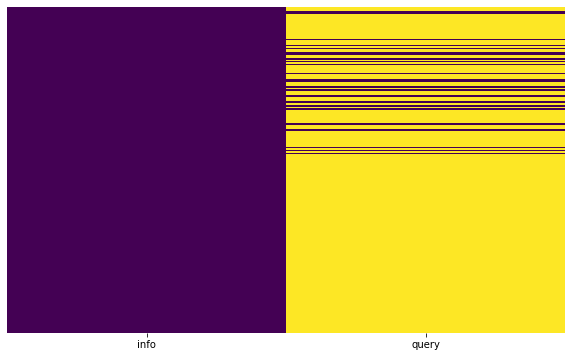

In [ ]:
fe_philer_concept = pd.read_csv("C:/Users/zhenj/Box/Porfolio/Projects/Project Vox/Data/female_philosopher_concept/female_philosopher_concept.csv")
fe_philer_concept

# empty rows

fe_philer_concept.dropna(subset=['info'], inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(fe_philer_concept.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [ ]:
fe_philer_concept["info"] = [i.replace(" | ","") for i in fe_philer_concept["info"]]
# fe_philer_concept["info"]


concept_author_list = []
for i in fe_philer_concept['info']:
    next = i.index(' (')+2
    if i[next].isdigit() or i[next:next+3] == "ca.": # if "(" is followed by the time, not a name
        print(i.replace(' (',';'))
        concept_author_list.append(i.replace(' (',';'))
        
    else:
        sub = i[next:].replace(' (',';')
        print(i[:next]+sub)
        concept_author_list.append(i[:next]+sub)
        


# fe_philer_concept["info"]

Justice in Catherine of Siena;1347–1380)
Abolition in Frances (Fanny) Wright;1795–1852)
Abolitionism in Lydia Maria Child;1802–1880)
Abortion in G.E.M. Anscombe;1919–2001)
Action in Hannah Arendt;1905–1975)
Action in Jeanne-Marie Bouvier de la Motte Guyon;1648–1717).
Aesthetics in Vernon Lee (Violet Paget);1856–1935)
Affective Memory in Vernon Lee (Violet Paget);1856–1935)
Analysis, directional in Susan Stebbing;1885–1943)
Ancient Medicine and Method in Maja Hudoletnjak Grgić;1964–2010)
Antiscientism in Mary Midgley;1919–2018)
Art in Anne Le Fèvre Dacier;1647–1720)
Art in Madeleine de Scudéry;1607–1701)
Art in Vernon Lee (Violet Paget);1856–1935)
Art, Social Significance of in Vernon Lee (Violet Paget);1856–1935)
Artistic Experience: Physiology in Vernon Lee (Violet Paget);1856–1935)
Artistic experience: Psychology in Vernon Lee (Violet Paget);1856–1935)
Ascent in Diotima of Mantinea;ca. 440 b.c.e.)
Atheism in Frances (Fanny) Wright;1795–1852)
Atheism in Frances Power Cobbe;1822–1904)


In [ ]:

concept_author_list
concept_author_list = [i[:-1] for i in concept_author_list]
fe_philer_concept["concept_author"] = concept_author_list
fe_philer_concept[['concept_author','time']] = fe_philer_concept["concept_author"].str.split(';', expand=True)


In [ ]:
# fe_philer_concept['info'].str.split(' \(', expand=True)
df = fe_philer_concept["concept_author"].str.split(' in ', expand=True)
for i in range(len(df[2])):
    if df[2].iloc[i] is not None:
        print(i, fe_philer_concept["concept_author"].iloc[i])



38 Conscience (Role in Morality) in Catharine Beecher


In [ ]:
fe_philer_concept["concept_author"].iloc[38] = "Conscience (Role in Morality);Catharine Beecher"
fe_philer_concept["concept_author"].iloc[38]

'Conscience (Role in Morality);Catharine Beecher'

In [ ]:


list = []
for i in range(len(fe_philer_concept["concept_author"])):
    item = fe_philer_concept["concept_author"].iloc[i]
    # print(item)
    if item.find(";") == -1:
        item = item.replace(" in ",";").replace(" In ",";")
    list.append(item)
# df[2]
list


['Justice;Catherine of Siena',
 'Abolition;Frances (Fanny) Wright',
 'Abolitionism;Lydia Maria Child',
 'Abortion;G.E.M. Anscombe',
 'Action;Hannah Arendt',
 'Action;Jeanne-Marie Bouvier de la Motte Guyon',
 'Aesthetics;Vernon Lee (Violet Paget)',
 'Affective Memory;Vernon Lee (Violet Paget)',
 'Analysis, directional;Susan Stebbing',
 'Ancient Medicine and Method;Maja Hudoletnjak Grgić',
 'Antiscientism;Mary Midgley',
 'Art;Anne Le Fèvre Dacier',
 'Art;Madeleine de Scudéry',
 'Art;Vernon Lee (Violet Paget)',
 'Art, Social Significance of;Vernon Lee (Violet Paget)',
 'Artistic Experience: Physiology;Vernon Lee (Violet Paget)',
 'Artistic experience: Psychology;Vernon Lee (Violet Paget)',
 'Ascent;Diotima of Mantinea',
 'Atheism;Frances (Fanny) Wright',
 'Atheism;Frances Power Cobbe',
 'Attention;Iris Murdoch',
 'Attention;Simone Weil',
 'Authority and Gender;Angélique Arnauld',
 'Autobiography;Sarah Kofman',
 'Barbarism;Simone Weil',
 'Being, Nature of;Antoinette Brown Blackwell',
 'Bas

In [ ]:
fe_philer_concept["concept_author"] = list
fe_philer_concept[['concept','author']] = fe_philer_concept["concept_author"].str.split(';', expand=True)
fe_philer_concept

In [ ]:
fe_philer_concept[['concept','author','time']].to_csv("C:/Users/zhenj/Box/Porfolio/Projects/Project Vox/Data/female_philosopher_concept/female_philosopher_concept_cleaned.csv", index=False)

import the cleaned dataset

In [6]:
data_cleaned = pd.read_csv("C:/Users/zhenj/Box/Porfolio/Projects/Project Vox/Data/female_philosopher_concept/female_philosopher_concept_cleaned.csv")
df = data_cleaned

In [7]:
concept_count_list = []
author_count_list = []


concepts = set(df['concept'].dropna())
authors = set(df['author'].dropna())



concept_list = list(concepts)
author_list = list(authors)


for i in range(len(concept_list)):
    item = concept_list [i]
    concept_count_list.append(df['concept'].tolist().count(item))
    
    

for i in authors:
    author_count_list.append(df['author'].tolist().count(i))

concept_df = pd.DataFrame({'concept': concept_list, 'concept_count': concept_count_list})
women_phil_df = pd.DataFrame({'author': author_list, 'author_count': author_count_list})

In [131]:
concept_list

['Hylomorphism',
 'Pain',
 'Social responsibility of individuals',
 'Liberty',
 'Existence of God, Arguments for / Revelation',
 'God’s Nature',
 'Existential Freedom',
 'Labor',
 'Economic Rights of Individuals',
 'Faith',
 'Abortion',
 'Education',
 'Life',
 'Pacifism',
 'Hypotheses',
 'Love / Religious Faith (Nature of)',
 'Freedom',
 'Politeness',
 'Fallacies (Metaphysical)',
 'Determinism and Freedom',
 'Death',
 'Inner Freedom and Outer Conditions of Liberty',
 'God (Knowledge of)',
 'Darwinism and Morality',
 'Republicanism',
 'Mind-body Identity',
 'Natural Religion',
 'Immortality',
 'Otherness',
 'Pleasure',
 'Creationism',
 'Responsible Freedom',
 'Aesthetics',
 'Misandry',
 'Potted thinking',
 'Gender and Equality',
 'Free Will vs. Determinism (Fatalism)',
 'Domestic Violence',
 'God',
 'Ethic of Intention',
 'Conscience (Role in Morality)',
 'Existentialism',
 'Language',
 'Slavery',
 'Passions',
 'Education of Women',
 'Self',
 'Abolition',
 'Education (Right of)',
 'Affe

In [8]:
# the authors for certain concepts
concept_author_list = []

for i in concept_list:

    # print(np.where(df["concept"] == i))
    idx = np.where(df["concept"] == i)
    # print(df['author'].loc[idx].tolist())
    aut = df['author'].loc[idx].tolist()
    concept_author_list.append(aut)

In [9]:
concept_distance_list = []

for i in concept_author_list:
    weighted_value = 0
    for author in i: # author name j for the concept i
        idx = np.where(women_phil_df["author"] == author)
        # print(idx,int(list(idx)[0]))
        # print(author, women_phil_df['author_count'].loc[idx])
        value = women_phil_df['author_count'].loc[idx].dropna().tolist() # value is author weight, because, the number is always 1
        value = int(value[0])
        # idx = int(list(idx)[0])
        # author_weight = author_count_list[idx]
        # print(value,author, author_weight)
    weighted_value = weighted_value + value
    concept_distance_list.append(weighted_value)



180 180 180


concept

In [10]:
concept_df


,concept,concept_count
0,Barbarism,1
1,Revelation,1
2,Knowledge,3
3,Conformity,1
4,Immortality,1
...,...,...
175,Family,1
176,Sagehood,1
177,Fallacies (Metaphysical),1
178,Evolutionary Cosmology,1


In [40]:
women_phil_df

,author,author_count
0,Alice Ambrose,1
1,Damaris Cudworth Masham,2
2,Catharine Beecher,5
3,Jane Addams,5
4,Iri s Murdoch,1
...,...,...
68,Hedwig Conrad-Martius,1
69,Anne Sophie Swetchine,6
70,Antoinette Brown Blackwell,8
71,Oliva Sabuco de Nantes,1


In [11]:
import math 
angle_list = []

for i in range(len(concept_list)):
    # idx = i+1
    sec = 2 * math.pi/len(concept_list)
    angle_list.append(sec*i)

In [14]:
article_list

['https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article=Barbone - Hylomorphism in Sabuco.docx.xml',
 'https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article=Berges -  Basis of Morality in Grouchy.docx.xml',
 'https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article=Berges -  Empathy in Grouchy.docx.xml',
 'https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article=Berges - Virtue Ethics in Grouchy.docx.xml',
 'https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article=Borsic and Karasman - Misandry in Druskowitz.docx.xml',
 "https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article=Broad - God's Mind and Human Knowledge in Masham.docx.xml",
 'https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article=Broad - Human Nature in Masham.docx.xml',
 "https://historyofwomenphilosophers.org/ecc/get.php?lang=en&article=Broad - Women's Nature in Masham.docx.xml",
 'https://historyofwomenphilosophers.org/ecc/get.php?lang=en&articl

Organize information into a Dataframe for the visualization

In [ ]:
# author-centered
author_df = pd.DataFrame(dict(
    {
        "authorname":,
        "author_info":author_list,
        "":,
        "concept_info":article_list,
        "weighted_distance":,
        "":,
        "":
    }
))

author_df

In [29]:
map_x = []
map_y = []
for i in range(180):
    map_y.append(math.sin(angle_list[i])*(1/concept_distance_list[i]))
    map_x.append(math.cos(angle_list[i])*(1/concept_distance_list[i]))

In [26]:
print(len(concept_author_list),len(concept_df),len(concept_distance_list),len(concept_list),len(angle_list),len(map_distance_list))

180 180 180 180 180 180


In [30]:
# concept-centered
concept_df = pd.DataFrame(dict(
    {
        "concept":concept_list,
        "concept_count":concept_count_list,
        "authors":concept_author_list,
        
        "weighted_distance":concept_distance_list,
        # "author_info":author_list,
        # "concept_info":article_list,
        "map_x":map_x,
        "map_y":map_y,
        "angle":angle_list
    }
))

concept_df

,concept,concept_count,authors,weighted_distance,map_x,map_y,angle
0,Barbarism,1,[Simone Weil],4,0.250000,0.000000,0.000000
1,Revelation,1,[Antoinette Brown Blackwell],8,0.124924,0.004362,0.034907
2,Knowledge,3,"[Madeleine de Scudéry, Catherine of Siena, Mad...",1,0.997564,0.069756,0.069813
3,Conformity,1,[Harriet Taylor Mill],4,0.248630,0.026132,0.104720
4,Immortality,1,[Diotima of Mantinea],5,0.198054,0.027835,0.139626
...,...,...,...,...,...,...,...
175,Family,1,[Sophie de Grouchy],7,0.140687,-0.024807,6.108652
176,Sagehood,1,[Im Yunjidang 임윤지�?任允摯堂],2,0.495134,-0.069587,6.143559
177,Fallacies (Metaphysical),1,[Hannah Arendt],3,0.331507,-0.034843,6.178466
178,Evolutionary Cosmology,1,[Antoinette Brown Blackwell],8,0.124696,-0.008720,6.213372


In [28]:
concept_df.to_csv("concept_starmap_data.csv", header=True)